<a href="https://colab.research.google.com/github/rodrigorissettoterra/Estatistica_descritiva_com_Python/blob/main/Estat%C3%ADstica_Teste_de_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatística: Teste de Hipóteses com Python

Site referência: https://www.ibge.gov.br/estatisticas/sociais/trabalho/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados

##Variáveis utilizadas

**Renda:** Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.</br></br>
**Idade:** Idade do morador na data de referência em anos.</br></br>
**Altura:** Altura do morador em metros.</br></br>
**UF:**</br>

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

</br></br>
**Sexo**

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

</br></br>
**Anos de Estudo**

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

</br></br>
**Cor**

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

##Observação sobre a base de dados

> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

#Preparando o ambiente

##Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest

##Carregando a base de dados

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Base de dados/IBGE/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


##Informações sobre a base de dados

In [3]:
print('Dimensões da base de dados:')
print('A base de dados possui {} linhas e {} colunas.'.format(dados.shape[0], dados.shape[1]))
print('\nContendo algumas das seguintes informações:')
print('A base de dados apresenta idades mínima de %s até %s anos.' % (dados.Idade.min(), dados.Idade.max()))
print('A base de dados apresenta anos de estudos mínimo de %s até %s anos.' % (
    dados['Anos de Estudo'].min(), dados['Anos de Estudo'].max())
)
print('A base de dados apresenta rendas mínima de %s até %s reais.' % (
    dados['Renda'].min(), dados['Renda'].max())
)
print('A base de dados apresenta alturas mínima de %s até %s metro.' % (
    round(dados['Altura'].min(),2),round(dados['Altura'].max(),2))
)

Dimensões da base de dados:
A base de dados possui 76840 linhas e 7 colunas.

Contendo algumas das seguintes informações:
A base de dados apresenta idades mínima de 13 até 99 anos.
A base de dados apresenta anos de estudos mínimo de 1 até 17 anos.
A base de dados apresenta rendas mínima de 0 até 200000 reais.
A base de dados apresenta alturas mínima de 1.34 até 2.03 metro.


##Dados faltantes

In [4]:
dados.isna().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

##Dados nulos

In [5]:
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

#Teste de hipóteses

##Teste de normalidade

###Definindo a significância do teste (α)

Observação: os valores mais comuns para α são 10%, 5% e 1%

In [6]:
significancia = 0.05

###Testando a variável Renda

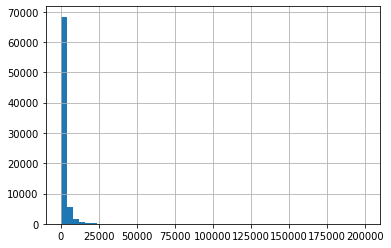

In [7]:
dados.Renda.hist(bins = 50)

####Critério do valor *p* - Renda

Rejeitar ***H<sub>0</sub>*** se o valor de ***p ≤ 0,05***.

A função ***normaltest*** testa a hipótese nula ***H<sub>0</sub>*** de que a amostra é proveniente de uma distribuição normal.

In [8]:
stat_test_renda, p_valor_renda = normaltest(dados.Renda)
print('Stat test: ',stat_test_renda)
print('p_valor: ', p_valor_renda)

Stat test:  152380.75803960307
p_valor:  0.0


Como p_valor é MENOR que a significância, rejeitamos a Hipótese nula (**H<sub>0</sub>**), ou seja, a amostra não é proveniente da uma amostra normal. 
___

###Testando a variável Altura

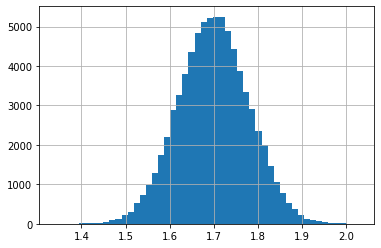

In [9]:
dados.Altura.hist(bins = 50)

####Critério do valor *p* - Altura

Rejeitar ***H<sub>0</sub>*** se o valor de ***p ≤ 0,05***.

A função ***normaltest*** testa a hipótese nula ***H<sub>0</sub>*** de que a amostra é proveniente de uma distribuição normal.

In [10]:
stat_test_altura, p_valor_altura = normaltest(dados.Altura)
print('Stat test: ',stat_test_altura)
print('p_valor: ', p_valor_altura)

Stat test:  0.19973093957002253
p_valor:  0.9049591541967501


Como p_valor é MAIOR que a significância, ACEITAMOS a Hipótese nula (**H<sub>0</sub>**), ou seja, a amostra é proveniente da uma amostra normal. 
___